## Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Importing Data
path = r'C:\Users\ztrim\07-2025 Boat Sales Analysis'

In [3]:
path

'C:\\Users\\ztrim\\07-2025 Boat Sales Analysis'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cleaned_boat_data.csv'), index_col = False)

In [7]:
# Droping rows with missing or zero in price and length 
df = df[(df['Price'].notnull()) & (df['Length'].notnull())]
df = df[(df['Price'] > 0) & (df['Length'] > 0)]

In [8]:
# Filter to EUR only for consistent pricing
df_eur = df[df['Currency'] == 'EUR'].copy()

In [11]:
print("Filtered dataset shape:", df_eur.shape)

Filtered dataset shape: (8424, 12)


In [12]:
df_eur[['Length', 'Price']].describe()

,Length,Price
count,8424.000000,8.424000e+03
mean,12.018516,3.120818e+05
std,6.073426,9.990622e+05
min,1.040000,3.300000e+03
25%,7.900000,4.687500e+04
50%,10.800000,9.900000e+04
75%,14.330000,2.591250e+05
max,100.000000,3.100000e+07


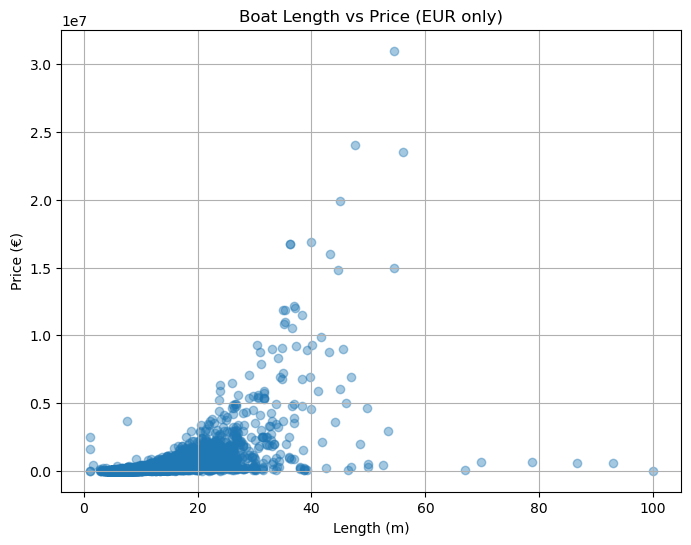

In [15]:
# Step 4: Creating a Scatterplot: Length vs Price (already decided on this)
plt.figure(figsize=(8,6))
plt.scatter(df_eur['Length'], df_eur['Price'], alpha=0.4)
plt.title('Boat Length vs Price (EUR only)')
plt.xlabel('Length (m)')
plt.ylabel('Price (€)')
plt.grid(True)
plt.show()

## Step 5: Hypothesis: As length increases, price tends to increase.

In [16]:
# Step 6: Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.
X = df_eur['Length'].values.reshape(-1, 1)
y = df_eur['Price'].values.reshape(-1, 1)

In [17]:
# Step 7: Split the data into two sets: a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# Step 8: Run a linear regression on the data.

# 8.1: First, fit the model you created to the training set:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [19]:
# 8.2: Then, create a prediction for y on the test set.
y_pred = regression.predict(X_test)

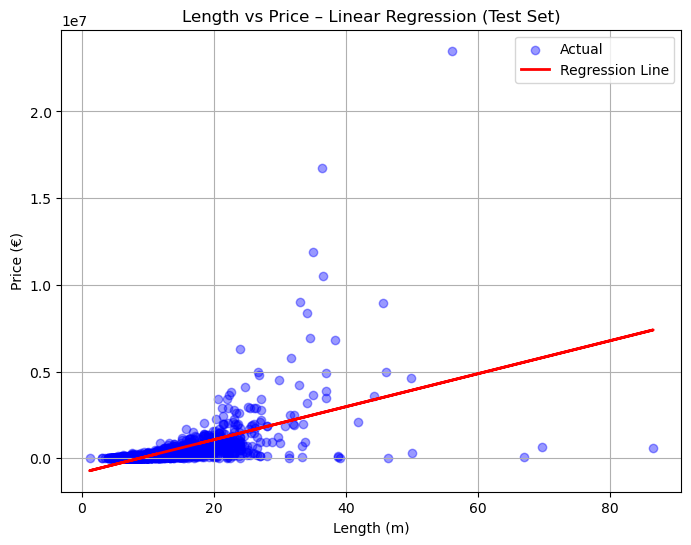

In [20]:
# Step 9: Create a plot that shows the regression line on the test set.
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='blue', alpha=0.4, label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Length vs Price – Linear Regression (Test Set)')
plt.xlabel('Length (m)')
plt.ylabel('Price (€)')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# Step 10: Write your own interpretation of how well the line appears to fit the data in a markdown cell.

# The regression line confirms a general upward trend: longer boats usually have higher prices.  
# That said, the wide spread of data points suggests that price is also affected by other factors, not just length.


In [22]:
# Step 11: Check the model performance statistics—MSE and R2 score.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", round(mse, 2))
print("R-squared Score:", round(r2, 4))

Mean Squared Error: 555325386902.44
R-squared Score: 0.3052


In [23]:
# Notes: 
# The model shows that length does have an effect on price, but since the R-squared score is only around 0.31 and the error is quite high, 
# it's clear that other things like width, material, or year also play a big role.


In [24]:
# Step 12: Compare the predicted y values with the actual y values in a dataframe.
comparison_df = pd.DataFrame({
    'Actual Price': y_test.flatten(),
    'Predicted Price': y_pred.flatten()
})
comparison_df.head(10)

,Actual Price,Predicted Price
0,129000.0,2.373014e+05
1,7500.0,-1.938104e+04
2,775000.0,1.229807e+06
3,47520.0,-2.456419e+05
4,480000.0,1.452265e+06
5,1995000.0,2.355407e+06
6,240000.0,5.206028e+05
7,189000.0,1.774088e+05
8,360000.0,3.599386e+05
9,45000.0,-2.950770e+05


In [25]:
# Step 13: Include your thoughts on how well the model performed on the test set in a markdown cell.

# The model was able to pick up on a general trend, but it’s not very accurate.  
# Some of the predicted prices are close to the actual ones, but others are way off and a few are even negative. Which isn't very realistic.   
# This shows that boat length alone isn’t enough to predict price well, and things like width, material, or age probably matter too.

# 13.1: Include any reflections you have on the impact of possible data bias.

# I only used listings in EUR to keep things consistent, but this also left out a lot of other data.  
# Also, some boats might be listed at very high or low prices because of special features that aren’t in the dataset, which could affect the results.
